# Prediksi Harga Rumah 

### Nama    : Muhammad Nabil Nazhmi Kurniali
### NIM     : A11.2023.15366
----------------------------------------------------------------
### Ringkasan/Permasalahan Project dan Tujuan yang Akan Dicapai
#### Permasalahan: 
Dataset ini berisi informasi penjualan rumah di Ames, Iowa dari 2006-2010. Harga rumah dipengaruhi oleh 79+ fitur yang mencakup karakteristik fisik, kualitas bangunan, lokasi, dan fasilitas. Tantangannya adalah memprediksi harga jual (SalePrice) berdasarkan fitur-fitur tersebut.

#### Tujuan: 
Membangun model machine learning yang akurat untuk memprediksi harga rumah menggunakan berbagai algoritma seperti Random Forest, Gradient Boosting, dan XGBoost. Model ini dapat membantu real estate agent, pembeli, dan investor dalam mengestimasi nilai properti.

----------------------------------------------------------------
### Dataset: Kaggle House Prices - Advanced Regression Techniques
- **Sumber**: Kaggle Competition
- **Lokasi**: Ames, Iowa, USA
- **Periode**: 2006-2010
- **Training Data**: 1460 sampel
- **Fitur**: 79 fitur (numerik dan kategorikal)
- **Target**: SalePrice (harga jual dalam USD)

### Kategori Fitur:
1. **Properti Dasar**: MSSubClass, MSZoning, LotArea, LotFrontage
2. **Kualitas Bangunan**: OverallQual, OverallCond, ExterQual, ExterCond
3. **Ukuran & Ruangan**: GrLivArea, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, BedroomAbvGr, FullBath
4. **Lokasi**: Neighborhood, Condition1, Condition2
5. **Tahun**: YearBuilt, YearRemodAdd, GarageYrBlt
6. **Garasi**: GarageArea, GarageCars, GarageType, GarageQual
7. **Basement**: BsmtQual, BsmtCond, BsmtFinSF1, BsmtFinSF2
8. **Fasilitas Tambahan**: Fireplaces, PoolArea, WoodDeckSF, OpenPorchSF

## 1. Import Library

In [7]:
# Import library dasar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Import library untuk preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, RobustScaler
from sklearn.impute import SimpleImputer

# Import algoritma machine learning
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import xgboost as xgb

# Import untuk evaluasi model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Setting untuk visualisasi
plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline

print("✅ Semua library berhasil diimpor!")

✅ Semua library berhasil diimpor!


## 2. Membaca Dataset

In [8]:
# Load dataset dari path lokal
train_path = "dataset/train.csv"

print("📥 Loading dataset dari path lokal...")

# Load training data
train_df = pd.read_csv(train_path)
print(f"✅ Training data loaded: {train_df.shape}")

print(f"\n📊 Dataset: Kaggle House Prices - Advanced Regression Techniques")
print(f"📍 Lokasi: Ames, Iowa, USA")
print(f"📅 Periode: 2006-2010")
print(f"🏠 Training samples: {len(train_df):,}")
print(f"📋 Total fitur: {len(train_df.columns)-1} (excluding SalePrice)")
print(f"🎯 Target: SalePrice")
    

📥 Loading dataset dari path lokal...
✅ Training data loaded: (1460, 81)

📊 Dataset: Kaggle House Prices - Advanced Regression Techniques
📍 Lokasi: Ames, Iowa, USA
📅 Periode: 2006-2010
🏠 Training samples: 1,460
📋 Total fitur: 80 (excluding SalePrice)
🎯 Target: SalePrice


## 3. Exploratory Data Analysis (EDA)

In [9]:
# Informasi dasar dataset
print("=== INFORMASI DASAR DATASET ===")
print(f"Training data shape: {train_df.shape}")
print(f"Total missing values (train): {train_df.isnull().sum().sum()}")

print("\n=== TIPE DATA ===")
print(train_df.dtypes.value_counts())

print("\n=== STATISTIK TARGET (SalePrice) ===")
print(train_df['SalePrice'].describe())

=== INFORMASI DASAR DATASET ===
Training data shape: (1460, 81)
Total missing values (train): 7829

=== TIPE DATA ===
object     43
int64      35
float64     3
Name: count, dtype: int64

=== STATISTIK TARGET (SalePrice) ===
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [10]:
# Preview data
print("=== PREVIEW TRAINING DATA ===")
display(train_df.head())

=== PREVIEW TRAINING DATA ===


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


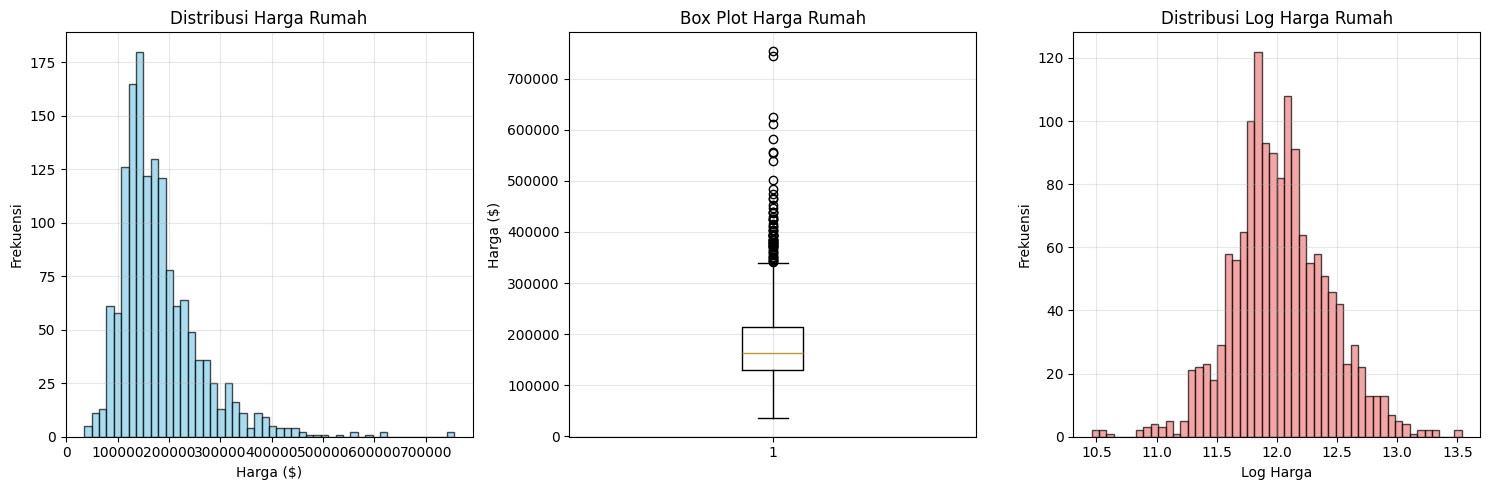

Harga rata-rata: $180,921
Harga median: $163,000
Harga minimum: $34,900
Harga maksimum: $755,000
Standar deviasi: $79,443


In [11]:
# Analisis target variable (SalePrice)
plt.figure(figsize=(15, 5))

# Distribusi SalePrice
plt.subplot(1, 3, 1)
plt.hist(train_df['SalePrice'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribusi Harga Rumah')
plt.xlabel('Harga ($)')
plt.ylabel('Frekuensi')
plt.grid(True, alpha=0.3)

# Box plot SalePrice
plt.subplot(1, 3, 2)
plt.boxplot(train_df['SalePrice'])
plt.title('Box Plot Harga Rumah')
plt.ylabel('Harga ($)')
plt.grid(True, alpha=0.3)

# Log transformation
plt.subplot(1, 3, 3)
plt.hist(np.log(train_df['SalePrice']), bins=50, alpha=0.7, color='lightcoral', edgecolor='black')
plt.title('Distribusi Log Harga Rumah')
plt.xlabel('Log Harga')
plt.ylabel('Frekuensi')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Harga rata-rata: ${train_df['SalePrice'].mean():,.0f}")
print(f"Harga median: ${train_df['SalePrice'].median():,.0f}")
print(f"Harga minimum: ${train_df['SalePrice'].min():,.0f}")
print(f"Harga maksimum: ${train_df['SalePrice'].max():,.0f}")
print(f"Standar deviasi: ${train_df['SalePrice'].std():,.0f}")

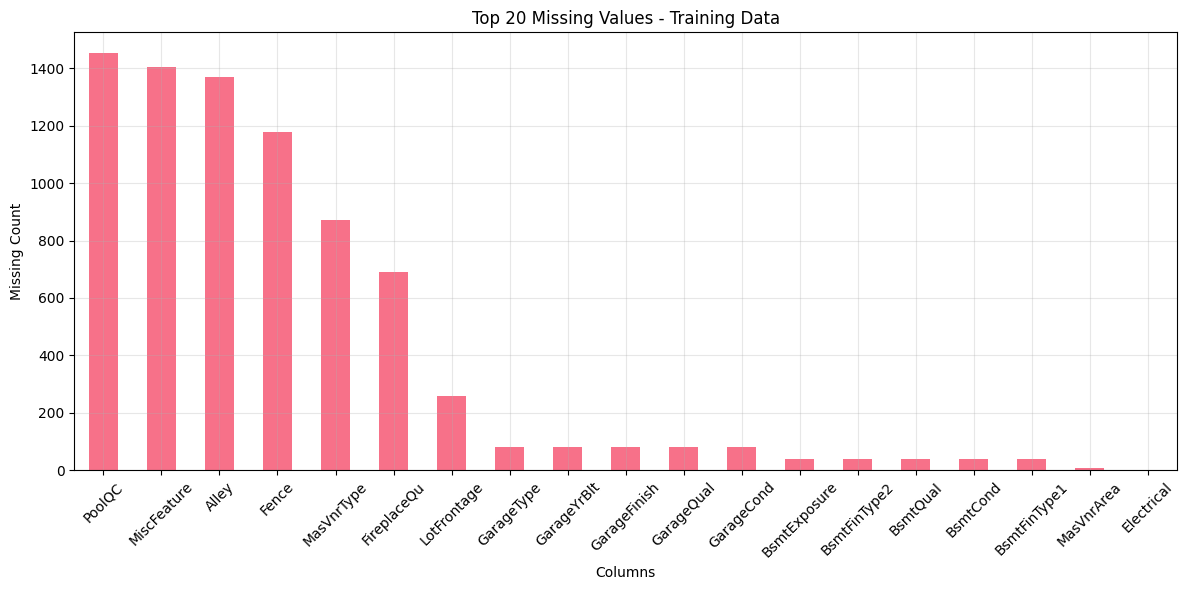

=== MISSING VALUES - Training Data ===
PoolQC: 1453 (99.5%)
MiscFeature: 1406 (96.3%)
Alley: 1369 (93.8%)
Fence: 1179 (80.8%)
MasVnrType: 872 (59.7%)
FireplaceQu: 690 (47.3%)
LotFrontage: 259 (17.7%)
GarageType: 81 (5.5%)
GarageYrBlt: 81 (5.5%)
GarageFinish: 81 (5.5%)


In [12]:
# Analisis missing values
def analyze_missing_values(df, title):
    missing_data = df.isnull().sum()
    missing_data = missing_data[missing_data > 0].sort_values(ascending=False)
    
    if len(missing_data) > 0:
        plt.figure(figsize=(12, 6))
        missing_data.head(20).plot(kind='bar')
        plt.title(f'Top 20 Missing Values - {title}')
        plt.xlabel('Columns')
        plt.ylabel('Missing Count')
        plt.xticks(rotation=45)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()
        
        print(f"=== MISSING VALUES - {title} ===")
        for col, count in missing_data.head(10).items():
            percentage = (count / len(df)) * 100
            print(f"{col}: {count} ({percentage:.1f}%)")
    else:
        print(f"✅ Tidak ada missing values dalam {title}!")
    
    return missing_data

train_missing = analyze_missing_values(train_df, "Training Data")

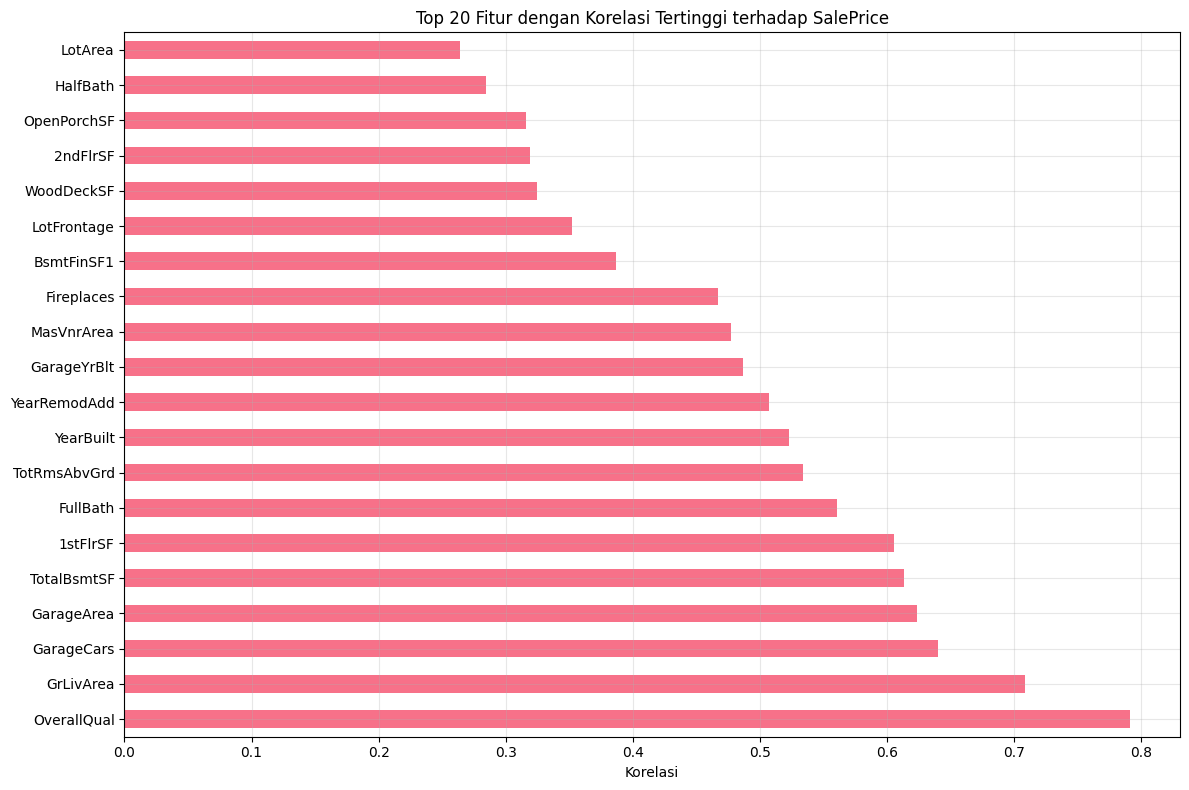

=== TOP 15 FITUR DENGAN KORELASI TERTINGGI ===
 1. OverallQual    : 0.7910
 2. GrLivArea      : 0.7086
 3. GarageCars     : 0.6404
 4. GarageArea     : 0.6234
 5. TotalBsmtSF    : 0.6136
 6. 1stFlrSF       : 0.6059
 7. FullBath       : 0.5607
 8. TotRmsAbvGrd   : 0.5337
 9. YearBuilt      : 0.5229
10. YearRemodAdd   : 0.5071
11. GarageYrBlt    : 0.4864
12. MasVnrArea     : 0.4775
13. Fireplaces     : 0.4669
14. BsmtFinSF1     : 0.3864
15. LotFrontage    : 0.3518


In [13]:
# Analisis korelasi dengan target
# Pilih hanya kolom numerik untuk korelasi
numeric_cols = train_df.select_dtypes(include=[np.number]).columns
correlations = train_df[numeric_cols].corr()['SalePrice'].sort_values(ascending=False)

# Plot korelasi
plt.figure(figsize=(12, 8))
top_corr = correlations[1:21]  # Top 20 excluding SalePrice itself
top_corr.plot(kind='barh')
plt.title('Top 20 Fitur dengan Korelasi Tertinggi terhadap SalePrice')
plt.xlabel('Korelasi')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("=== TOP 15 FITUR DENGAN KORELASI TERTINGGI ===")
for i, (feature, corr) in enumerate(correlations[1:16].items(), 1):
    print(f"{i:2d}. {feature:<15}: {corr:.4f}")

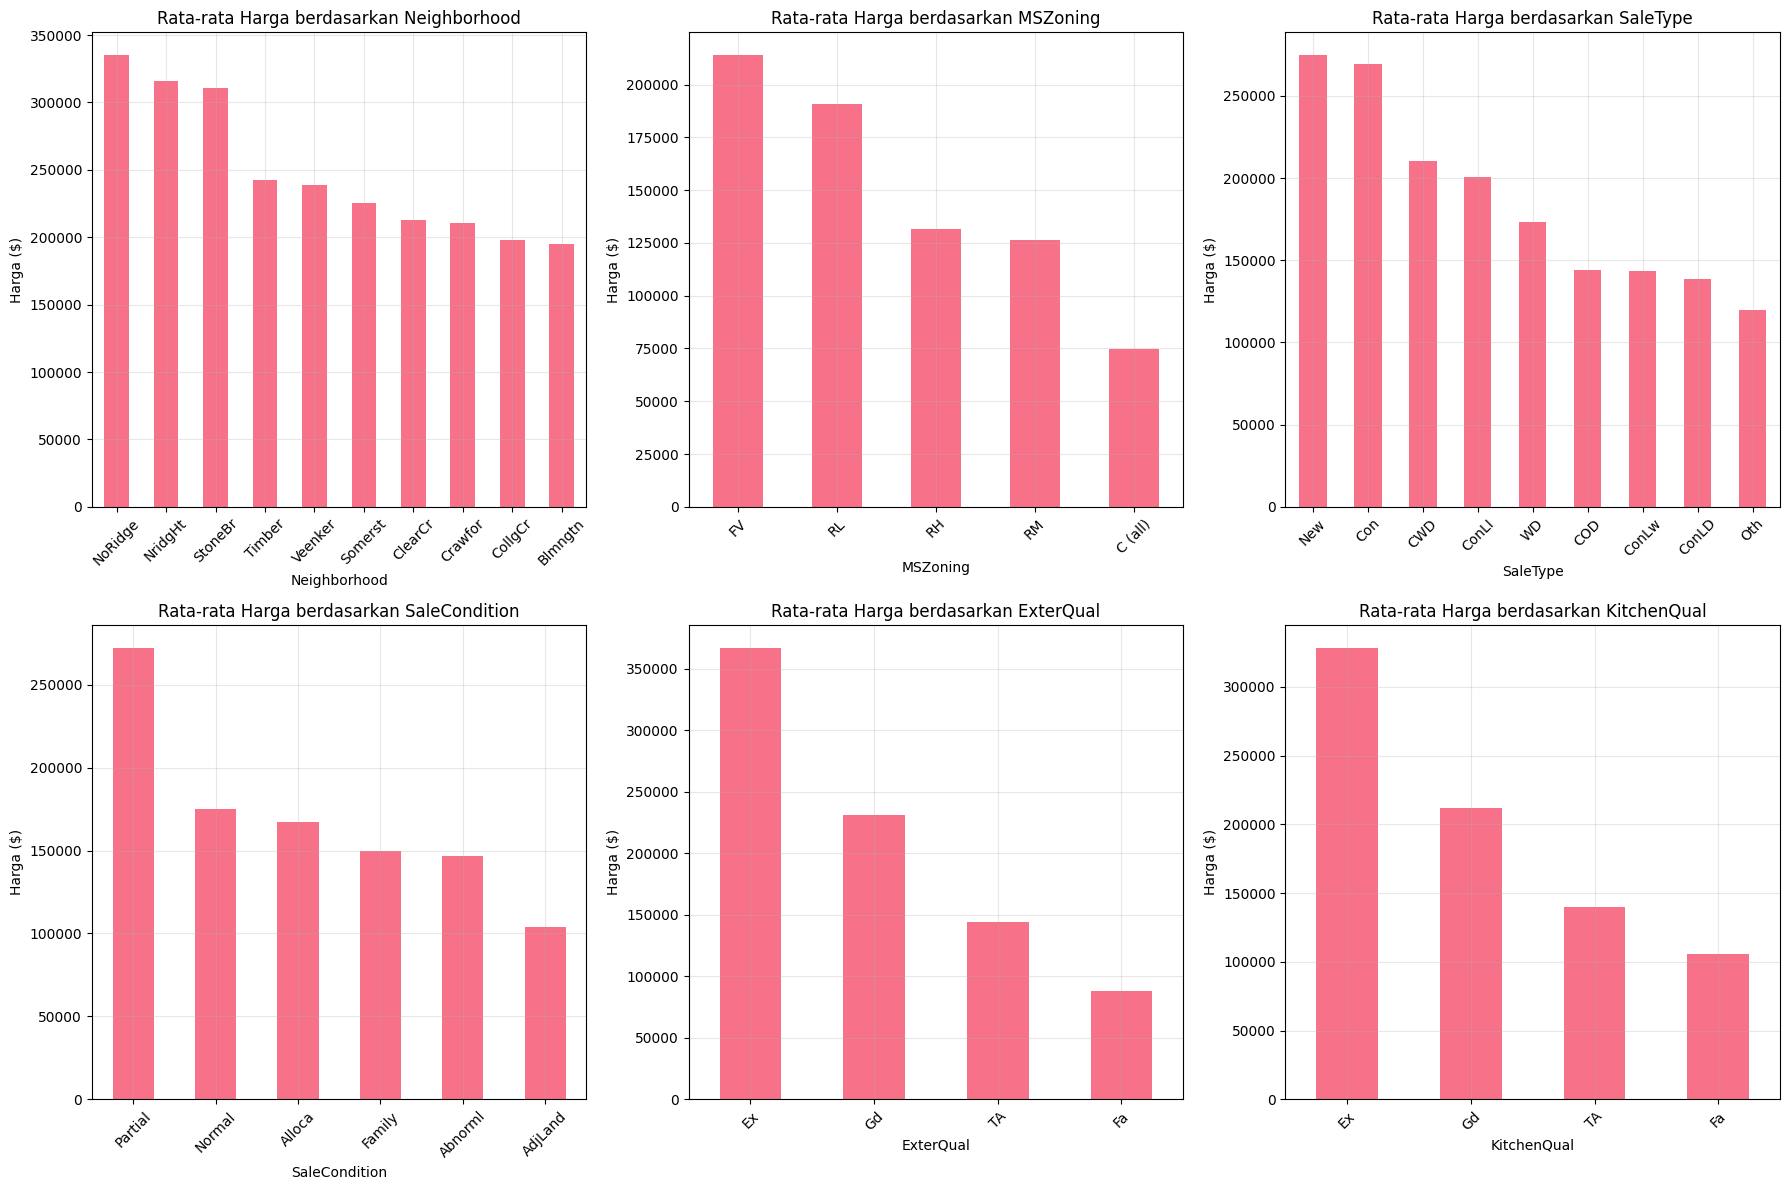

=== INSIGHTS FITUR KATEGORIKAL ===

Neighborhood:
  Tertinggi: NoRidge ($335,295)
  Terendah: MeadowV ($98,576)

MSZoning:
  Tertinggi: FV ($214,014)
  Terendah: C (all) ($74,528)

SaleType:
  Tertinggi: New ($274,945)
  Terendah: Oth ($119,850)

SaleCondition:
  Tertinggi: Partial ($272,292)
  Terendah: AdjLand ($104,125)

ExterQual:
  Tertinggi: Ex ($367,361)
  Terendah: Fa ($87,985)

KitchenQual:
  Tertinggi: Ex ($328,555)
  Terendah: Fa ($105,565)


In [14]:
# Analisis fitur kategorikal penting
categorical_features = ['Neighborhood', 'MSZoning', 'SaleType', 'SaleCondition', 'ExterQual', 'KitchenQual']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, feature in enumerate(categorical_features):
    if feature in train_df.columns:
        # Hitung rata-rata harga per kategori
        avg_price = train_df.groupby(feature)['SalePrice'].mean().sort_values(ascending=False)
        
        # Plot
        avg_price.head(10).plot(kind='bar', ax=axes[i])
        axes[i].set_title(f'Rata-rata Harga berdasarkan {feature}')
        axes[i].set_ylabel('Harga ($)')
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print insights
print("=== INSIGHTS FITUR KATEGORIKAL ===")
for feature in categorical_features:
    if feature in train_df.columns:
        avg_price = train_df.groupby(feature)['SalePrice'].mean().sort_values(ascending=False)
        print(f"\n{feature}:")
        print(f"  Tertinggi: {avg_price.index[0]} (${avg_price.iloc[0]:,.0f})")
        print(f"  Terendah: {avg_price.index[-1]} (${avg_price.iloc[-1]:,.0f})")

## 4. Data Preprocessing

In [15]:
# Pilih fitur berdasarkan korelasi dan domain knowledge
# Fitur numerik dengan korelasi tinggi
high_corr_features = correlations[1:16].index.tolist()  # Top 15

# Fitur kategorikal penting
important_categorical = [
    'Neighborhood', 'MSZoning', 'ExterQual', 'KitchenQual', 
    'BsmtQual', 'GarageType', 'SaleType', 'SaleCondition'
]

# Gabungkan semua fitur yang dipilih
selected_features = high_corr_features + important_categorical

# Pastikan fitur ada di dataset
selected_features = [f for f in selected_features if f in train_df.columns]

print(f"=== FITUR YANG DIPILIH ({len(selected_features)}) ===")
print("\nFitur Numerik (berdasarkan korelasi):")
for f in high_corr_features:
    if f in train_df.columns:
        print(f"  • {f}: {correlations[f]:.4f}")

print("\nFitur Kategorikal (berdasarkan domain knowledge):")
for f in important_categorical:
    if f in train_df.columns:
        print(f"  • {f}: {train_df[f].nunique()} kategori")

=== FITUR YANG DIPILIH (23) ===

Fitur Numerik (berdasarkan korelasi):
  • OverallQual: 0.7910
  • GrLivArea: 0.7086
  • GarageCars: 0.6404
  • GarageArea: 0.6234
  • TotalBsmtSF: 0.6136
  • 1stFlrSF: 0.6059
  • FullBath: 0.5607
  • TotRmsAbvGrd: 0.5337
  • YearBuilt: 0.5229
  • YearRemodAdd: 0.5071
  • GarageYrBlt: 0.4864
  • MasVnrArea: 0.4775
  • Fireplaces: 0.4669
  • BsmtFinSF1: 0.3864
  • LotFrontage: 0.3518

Fitur Kategorikal (berdasarkan domain knowledge):
  • Neighborhood: 25 kategori
  • MSZoning: 5 kategori
  • ExterQual: 4 kategori
  • KitchenQual: 4 kategori
  • BsmtQual: 4 kategori
  • GarageType: 6 kategori
  • SaleType: 9 kategori
  • SaleCondition: 6 kategori


In [16]:
# Fungsi preprocessing
def preprocess_data(df, selected_features, is_train=True):
    """
    Preprocessing data dengan handling missing values dan encoding
    """
    # Copy data
    df_processed = df[selected_features].copy()
    
    # Handle missing values
    for col in df_processed.columns:
        if df_processed[col].isnull().sum() > 0:
            if df_processed[col].dtype == 'object':
                # Untuk kategorikal, isi dengan 'None' atau modus
                if col in ['BsmtQual', 'GarageType']:
                    df_processed[col].fillna('None', inplace=True)
                else:
                    df_processed[col].fillna(df_processed[col].mode()[0], inplace=True)
            else:
                # Untuk numerik, isi dengan median
                df_processed[col].fillna(df_processed[col].median(), inplace=True)
    
    # Encode categorical variables
    categorical_cols = df_processed.select_dtypes(include=['object']).columns
    
    for col in categorical_cols:
        le = LabelEncoder()
        df_processed[col] = le.fit_transform(df_processed[col].astype(str))
    
    return df_processed

# Preprocess training data
X_processed = preprocess_data(train_df, selected_features, is_train=True)
y = train_df['SalePrice'].copy()

print("✅ Data preprocessing selesai!")
print(f"Shape data processed: {X_processed.shape}")
print(f"Missing values: {X_processed.isnull().sum().sum()}")
print(f"Target shape: {y.shape}")

✅ Data preprocessing selesai!
Shape data processed: (1460, 23)
Missing values: 0
Target shape: (1460,)


In [17]:
# Split data menjadi train, validation, dan test
# 60% train, 20% validation, 20% test
X_temp, X_test, y_temp, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42  # 0.25 x 0.8 = 0.2 dari total
)

print("=== DATA SPLITTING (3-WAY SPLIT) ===")
print(f"X_train shape: {X_train.shape} ({len(X_train)/len(X_processed)*100:.1f}%)")
print(f"X_val shape: {X_val.shape} ({len(X_val)/len(X_processed)*100:.1f}%)")
print(f"X_test shape: {X_test.shape} ({len(X_test)/len(X_processed)*100:.1f}%)")
print(f"Total: {len(X_train) + len(X_val) + len(X_test)} samples")

# Feature scaling
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

print("✅ Data splitting dan scaling selesai!")

=== DATA SPLITTING (3-WAY SPLIT) ===
X_train shape: (876, 23) (60.0%)
X_val shape: (292, 23) (20.0%)
X_test shape: (292, 23) (20.0%)
Total: 1460 samples
✅ Data splitting dan scaling selesai!


## 5. Model Training & Evaluation

In [18]:
# Inisialisasi model dengan parameter yang sudah di-tune
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=10),
    'Lasso Regression': Lasso(alpha=0.001),
    'Decision Tree': DecisionTreeRegressor(max_depth=10, random_state=42),
    'Random Forest': RandomForestRegressor(
        n_estimators=100, max_depth=15, min_samples_split=5, random_state=42
    ),
    'Gradient Boosting': GradientBoostingRegressor(
        n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42
    ),
    'XGBoost': xgb.XGBRegressor(
        n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42
    ),
    'SVR': SVR(kernel='rbf', C=100, gamma='scale')
}

# Dictionary untuk menyimpan hasil
results = {}
predictions = {}

print("=== TRAINING MODELS ===")
print("Model yang akan dilatih:")
for name in models.keys():
    print(f"  • {name}")
print()

for name, model in models.items():
    print(f"Training {name}...", end=" ")
    
    try:
        # Gunakan data scaled untuk SVR dan linear models, data biasa untuk tree-based
        if name in ['SVR', 'Ridge Regression', 'Lasso Regression']:
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_val_scaled)
        else:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_val)
        
        # Simpan prediksi
        predictions[name] = y_pred
        
        # Hitung metrik evaluasi
        mae = mean_absolute_error(y_val, y_pred)
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        r2 = r2_score(y_val, y_pred)
        
        results[name] = {
            'MAE': mae,
            'RMSE': rmse,
            'R2': r2,
            'Model': model
        }
        
        print(f"✅ R²: {r2:.4f}")
        
    except Exception as e:
        print(f"❌ Error: {str(e)}")
        continue

print("\n🎉 Training selesai!")

=== TRAINING MODELS ===
Model yang akan dilatih:
  • Linear Regression
  • Ridge Regression
  • Lasso Regression
  • Decision Tree
  • Random Forest
  • Gradient Boosting
  • XGBoost
  • SVR

Training Linear Regression... ✅ R²: 0.8223
Training Ridge Regression... ✅ R²: 0.8210
Training Lasso Regression... ✅ R²: 0.8223
Training Decision Tree... ✅ R²: 0.5931
Training Random Forest... ✅ R²: 0.8737
Training Gradient Boosting... ✅ R²: 0.8614
Training XGBoost... ✅ R²: 0.8685
Training SVR... ✅ R²: 0.0530

🎉 Training selesai!


In [19]:
# Evaluasi dan ranking model
results_df = pd.DataFrame({k: {metric: v[metric] for metric in ['MAE', 'RMSE', 'R2']} for k, v in results.items()}).T
results_df = results_df.sort_values('R2', ascending=False)

print("=== HASIL EVALUASI MODEL ===")
print(f"{'Rank':<4} {'Model':<20} {'R²':<8} {'MAE':<12} {'RMSE':<12}")
print("-" * 60)

for i, (model_name, row) in enumerate(results_df.iterrows(), 1):
    print(f"{i:<4} {model_name:<20} {row['R2']:<8.4f} {row['MAE']:<12,.0f} {row['RMSE']:<12,.0f}")

# Model terbaik
best_model_name = results_df.index[0]
best_r2 = results_df.loc[best_model_name, 'R2']
best_mae = results_df.loc[best_model_name, 'MAE']
best_rmse = results_df.loc[best_model_name, 'RMSE']

print(f"\n🏆 MODEL TERBAIK: {best_model_name}")
print(f"📊 R² Score: {best_r2:.4f} ({best_r2*100:.1f}% akurasi)")
print(f"📊 MAE: ${best_mae:,.0f}")
print(f"📊 RMSE: ${best_rmse:,.0f}")

=== HASIL EVALUASI MODEL ===
Rank Model                R²       MAE          RMSE        
------------------------------------------------------------
1    Random Forest        0.8737   18,007       27,498      
2    XGBoost              0.8685   17,696       28,061      
3    Gradient Boosting    0.8614   18,373       28,814      
4    Linear Regression    0.8223   21,732       32,621      
5    Lasso Regression     0.8223   21,732       32,621      
6    Ridge Regression     0.8210   21,717       32,739      
7    Decision Tree        0.5931   29,031       49,360      
8    SVR                  0.0530   51,598       75,305      

🏆 MODEL TERBAIK: Random Forest
📊 R² Score: 0.8737 (87.4% akurasi)
📊 MAE: $18,007
📊 RMSE: $27,498


## 6. Ensemble Model

In [20]:
# Buat ensemble dari 3 model terbaik
top_3_models = results_df.head(3).index.tolist()

print(f"=== ENSEMBLE MODEL ===")
print(f"Menggunakan 3 model terbaik:")
for i, model_name in enumerate(top_3_models, 1):
    r2_score_val = results_df.loc[model_name, 'R2']
    print(f"  {i}. {model_name} (R²: {r2_score_val:.4f})")

# Weighted ensemble berdasarkan R2 score
weights = []
for model_name in top_3_models:
    r2_score_val = results_df.loc[model_name, 'R2']
    weights.append(max(0, r2_score_val))  # Pastikan weight positif

# Normalize weights
total_weight = sum(weights)
weights = [w/total_weight for w in weights]

print(f"\nWeights: {[f'{w:.3f}' for w in weights]}")

# Hitung ensemble prediction
ensemble_pred = np.zeros(len(y_val))
for i, model_name in enumerate(top_3_models):
    ensemble_pred += weights[i] * predictions[model_name]

# Evaluasi ensemble
ensemble_mae = mean_absolute_error(y_val, ensemble_pred)
ensemble_rmse = np.sqrt(mean_squared_error(y_val, ensemble_pred))
ensemble_r2 = r2_score(y_val, ensemble_pred)

print(f"\n📊 HASIL ENSEMBLE MODEL:")
print(f"MAE: ${ensemble_mae:,.0f}")
print(f"RMSE: ${ensemble_rmse:,.0f}")
print(f"R²: {ensemble_r2:.4f} ({ensemble_r2*100:.1f}% akurasi)")

# Bandingkan dengan model terbaik
if ensemble_r2 > best_r2:
    print(f"\n🎯 Ensemble model LEBIH BAIK dari model terbaik!")
    print(f"Peningkatan R²: {ensemble_r2 - best_r2:.4f}")
else:
    print(f"\n📊 Model terbaik masih unggul dengan selisih R²: {best_r2 - ensemble_r2:.4f}")

=== ENSEMBLE MODEL ===
Menggunakan 3 model terbaik:
  1. Random Forest (R²: 0.8737)
  2. XGBoost (R²: 0.8685)
  3. Gradient Boosting (R²: 0.8614)

Weights: ['0.336', '0.334', '0.331']

📊 HASIL ENSEMBLE MODEL:
MAE: $17,423
RMSE: $27,041
R²: 0.8779 (87.8% akurasi)

🎯 Ensemble model LEBIH BAIK dari model terbaik!
Peningkatan R²: 0.0042


## 7. Feature Importance Analysis

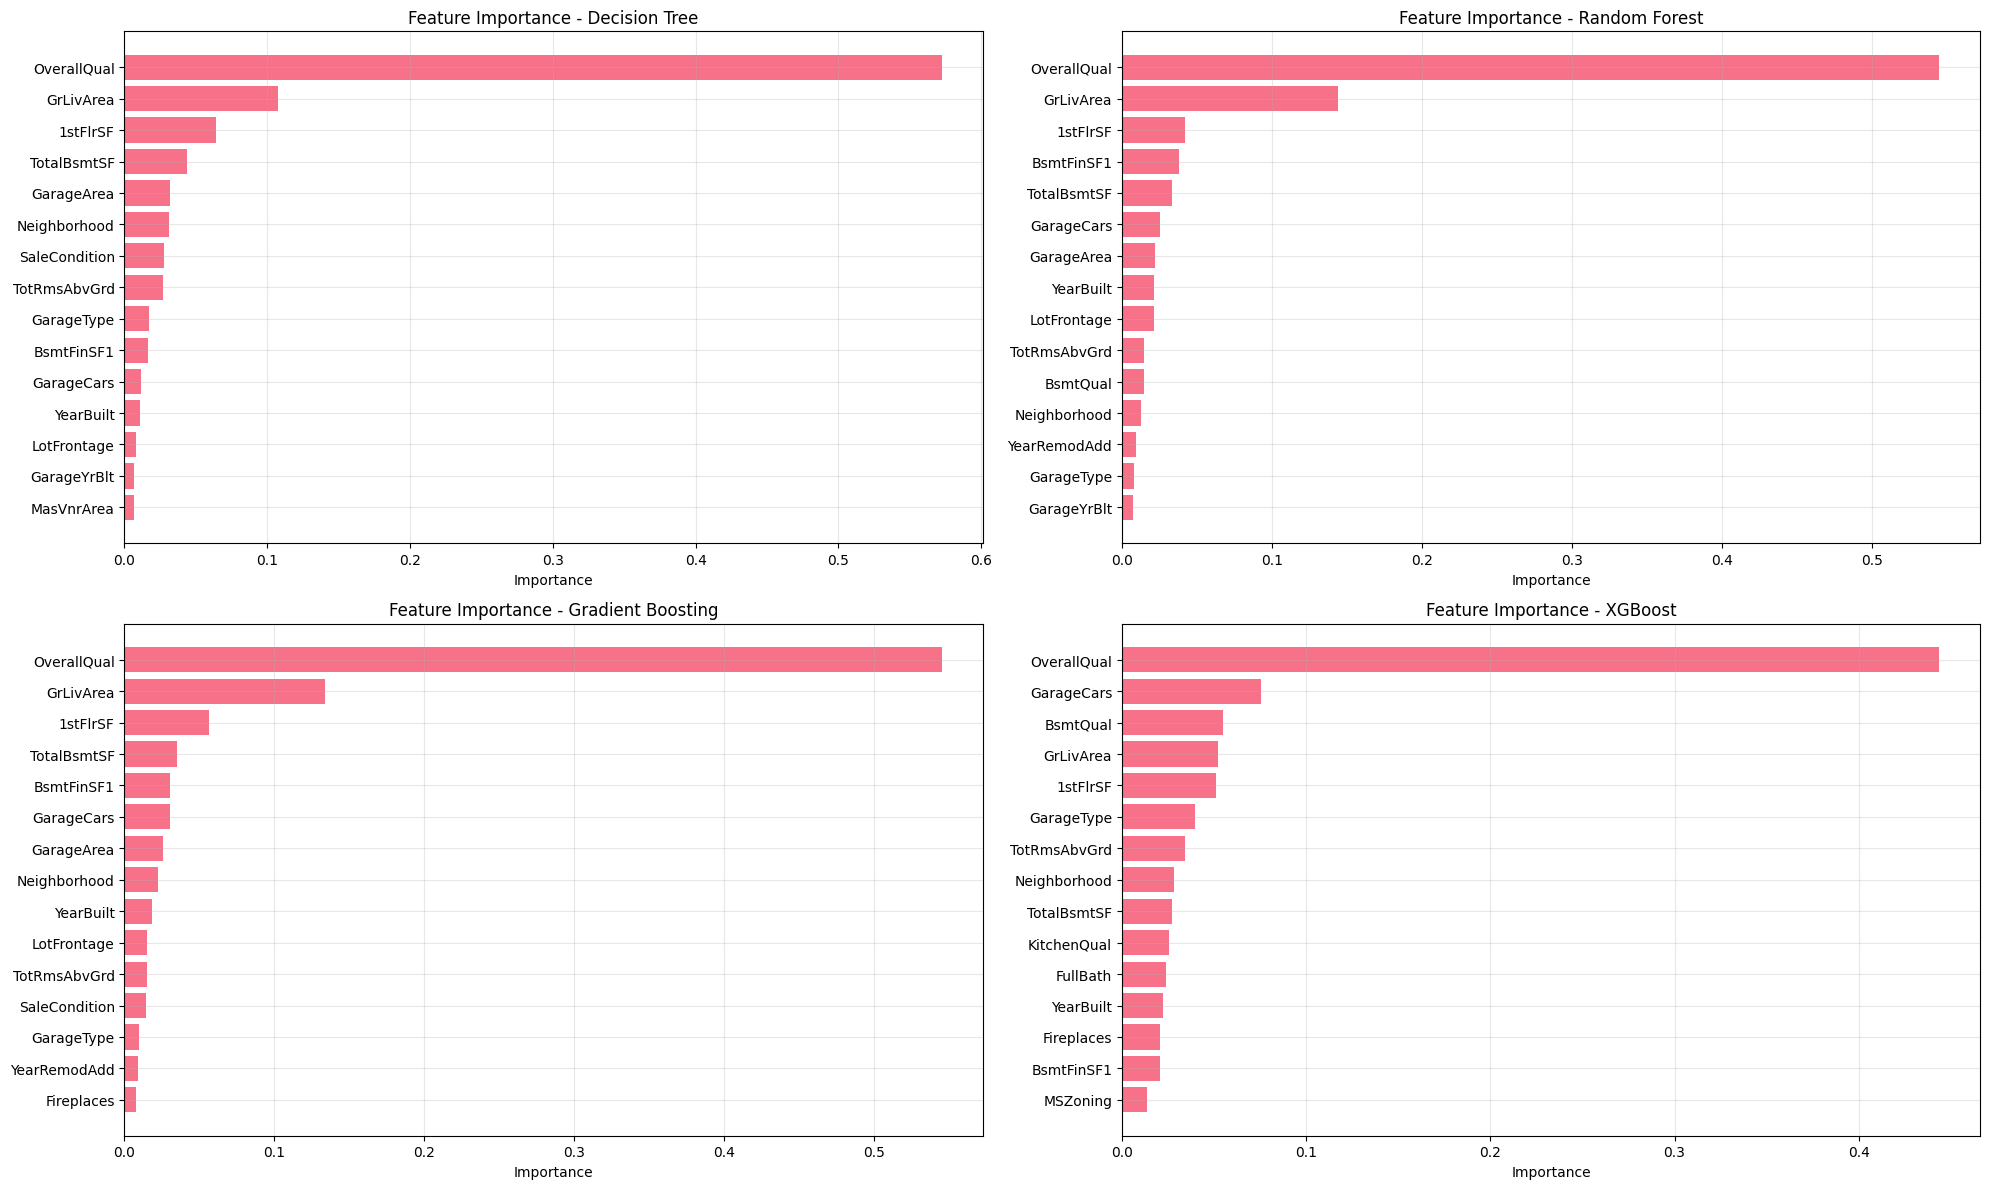

=== TOP 15 FEATURE IMPORTANCE - Random Forest ===
 1. OverallQual         : 0.5445
 2. GrLivArea           : 0.1437
 3. 1stFlrSF            : 0.0418
 4. BsmtFinSF1          : 0.0381
 5. TotalBsmtSF         : 0.0331
 6. GarageCars          : 0.0255
 7. GarageArea          : 0.0220
 8. YearBuilt           : 0.0213
 9. LotFrontage         : 0.0212
10. TotRmsAbvGrd        : 0.0151
11. BsmtQual            : 0.0148
12. Neighborhood        : 0.0126
13. YearRemodAdd        : 0.0096
14. GarageType          : 0.0078
15. GarageYrBlt         : 0.0076


In [21]:
# Analisis feature importance untuk tree-based models
tree_models = ['Decision Tree', 'Random Forest', 'Gradient Boosting', 'XGBoost']
available_tree_models = [m for m in tree_models if m in results]

if available_tree_models:
    fig, axes = plt.subplots(2, 2, figsize=(20, 12))
    axes = axes.ravel()
    
    for i, model_name in enumerate(available_tree_models[:4]):
        if i < len(axes):
            model = results[model_name]['Model']
            
            # Get feature importance
            if hasattr(model, 'feature_importances_'):
                importance = model.feature_importances_
                
                # Create DataFrame
                feature_imp_df = pd.DataFrame({
                    'Feature': X_processed.columns,
                    'Importance': importance
                }).sort_values('Importance', ascending=True)
                
                # Plot top 15 features
                top_features = feature_imp_df.tail(15)
                axes[i].barh(top_features['Feature'], top_features['Importance'])
                axes[i].set_title(f'Feature Importance - {model_name}')
                axes[i].set_xlabel('Importance')
                axes[i].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Print feature importance untuk model terbaik jika tree-based
    if best_model_name in available_tree_models:
        best_model = results[best_model_name]['Model']
        if hasattr(best_model, 'feature_importances_'):
            feature_imp_df = pd.DataFrame({
                'Feature': X_processed.columns,
                'Importance': best_model.feature_importances_
            }).sort_values('Importance', ascending=False)
            
            print(f"=== TOP 15 FEATURE IMPORTANCE - {best_model_name} ===")
            for i, (_, row) in enumerate(feature_imp_df.head(15).iterrows(), 1):
                print(f"{i:2d}. {row['Feature']:<20}: {row['Importance']:.4f}")
else:
    print("⚠️ Tidak ada tree-based model yang berhasil dilatih untuk analisis feature importance")

## 8. Comprehensive Visualization

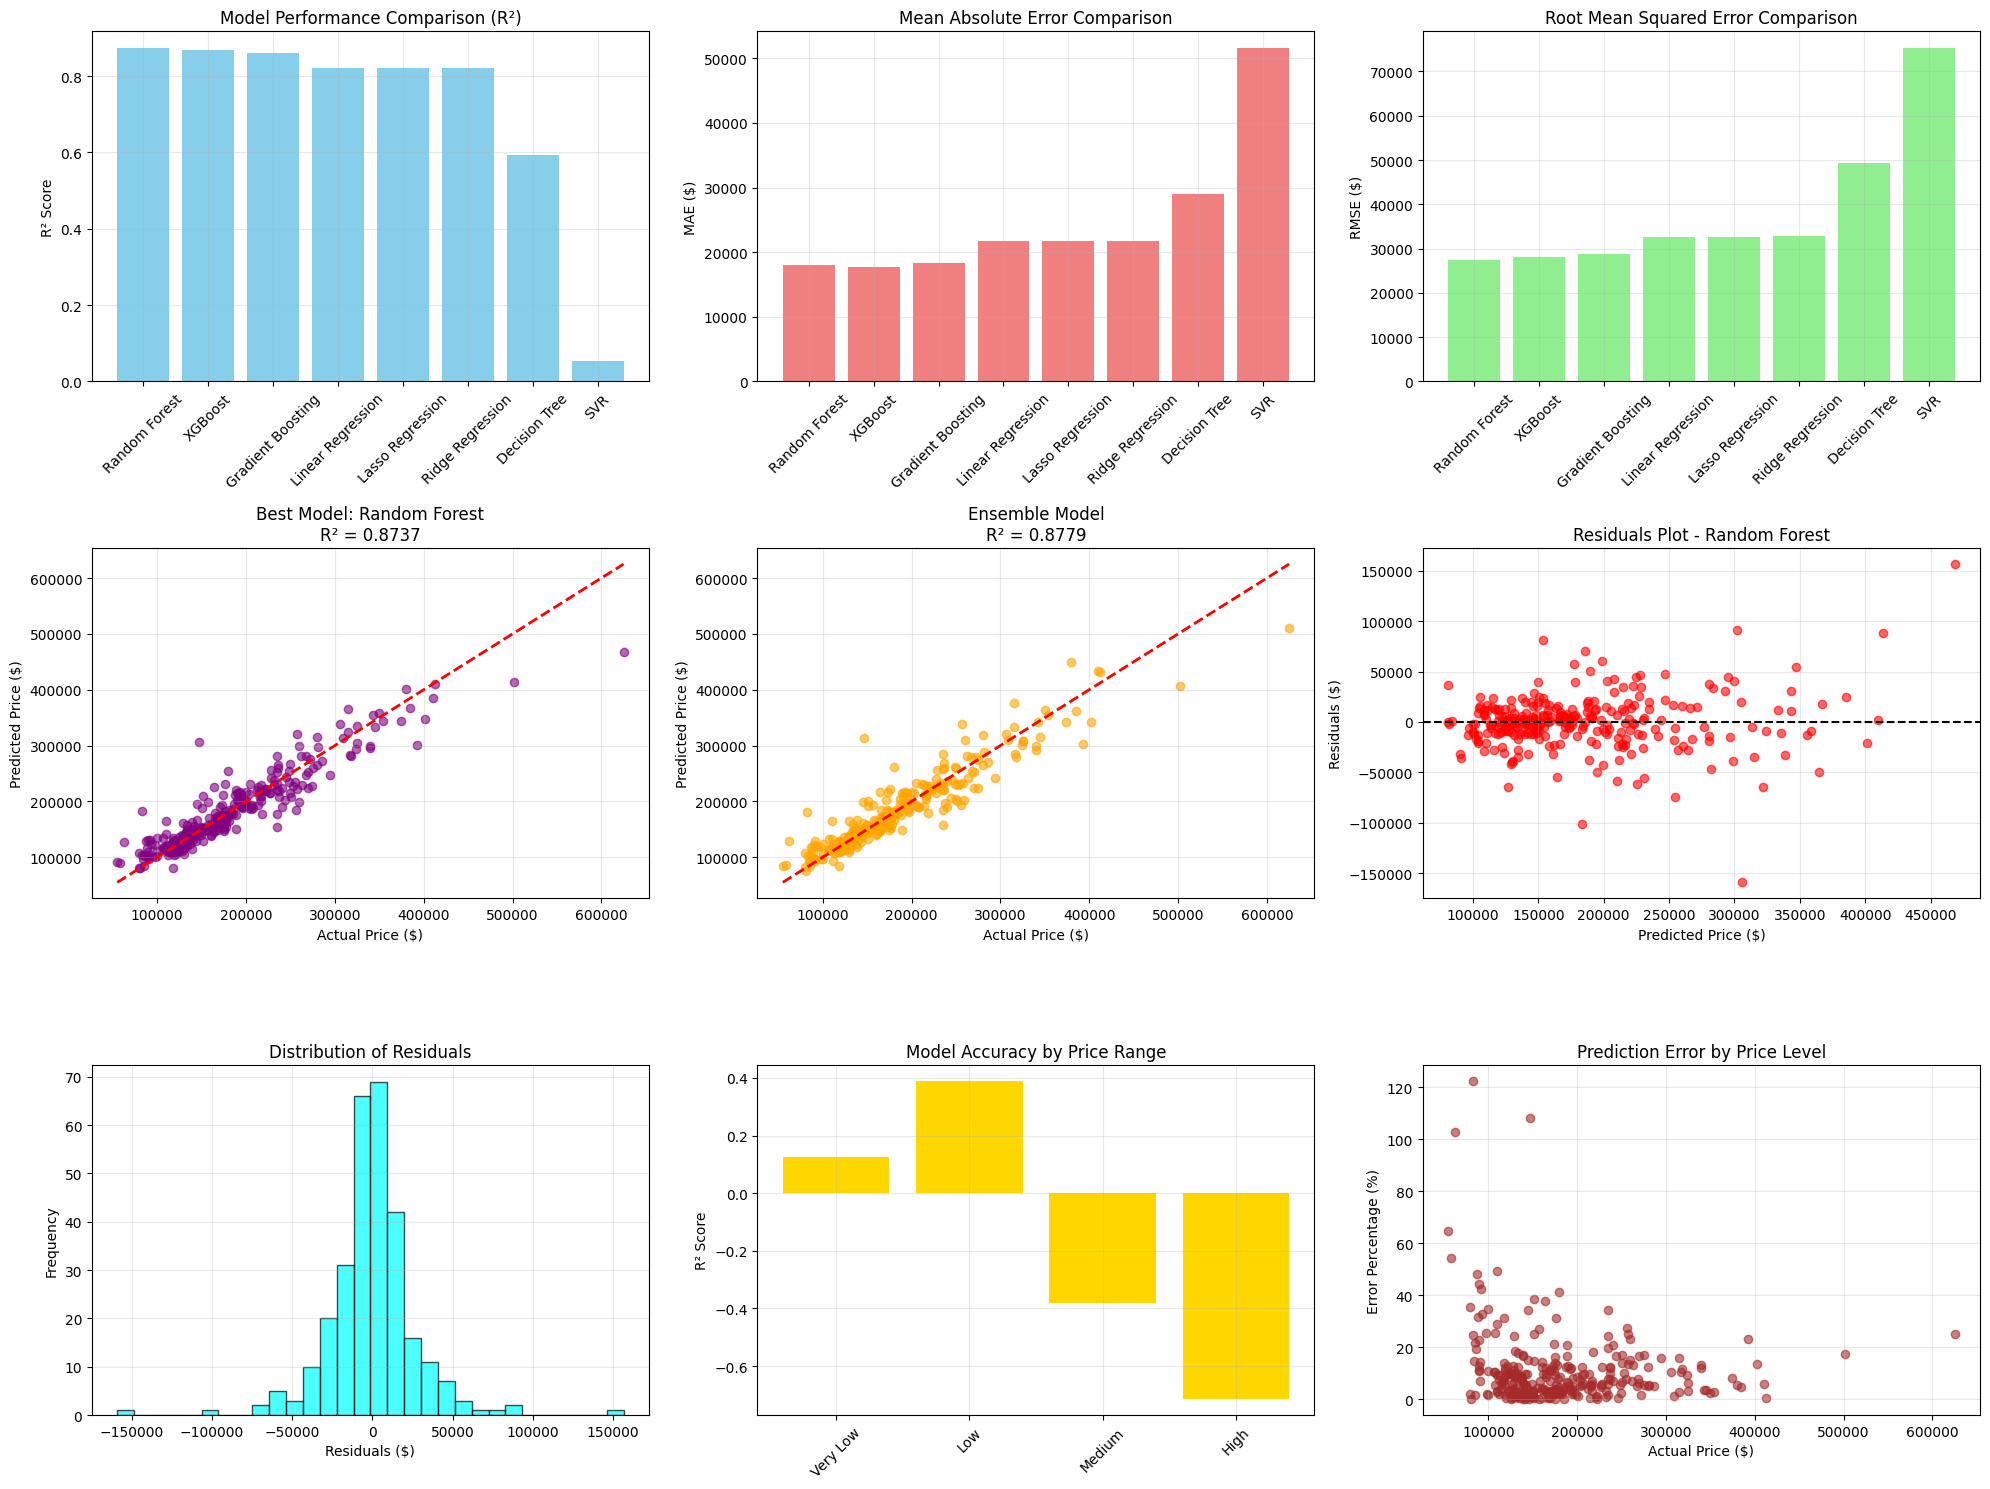

In [22]:
# Visualisasi komprehensif hasil
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.ravel()

# 1. Model Performance Comparison (R²)
axes[0].bar(results_df.index, results_df['R2'], color='skyblue')
axes[0].set_title('Model Performance Comparison (R²)')
axes[0].set_ylabel('R² Score')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3)

# 2. MAE Comparison
axes[1].bar(results_df.index, results_df['MAE'], color='lightcoral')
axes[1].set_title('Mean Absolute Error Comparison')
axes[1].set_ylabel('MAE ($)')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3)

# 3. RMSE Comparison
axes[2].bar(results_df.index, results_df['RMSE'], color='lightgreen')
axes[2].set_title('Root Mean Squared Error Comparison')
axes[2].set_ylabel('RMSE ($)')
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(True, alpha=0.3)

# 4. Best Model: Actual vs Predicted
best_predictions = predictions[best_model_name]
axes[3].scatter(y_val, best_predictions, alpha=0.6, color='purple')
axes[3].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
axes[3].set_xlabel('Actual Price ($)')
axes[3].set_ylabel('Predicted Price ($)')
axes[3].set_title(f'Best Model: {best_model_name}\nR² = {best_r2:.4f}')
axes[3].grid(True, alpha=0.3)

# 5. Ensemble: Actual vs Predicted
axes[4].scatter(y_val, ensemble_pred, alpha=0.6, color='orange')
axes[4].plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--', lw=2)
axes[4].set_xlabel('Actual Price ($)')
axes[4].set_ylabel('Predicted Price ($)')
axes[4].set_title(f'Ensemble Model\nR² = {ensemble_r2:.4f}')
axes[4].grid(True, alpha=0.3)

# 6. Residuals Plot (Best Model)
residuals = y_val - best_predictions
axes[5].scatter(best_predictions, residuals, alpha=0.6, color='red')
axes[5].axhline(y=0, color='black', linestyle='--')
axes[5].set_xlabel('Predicted Price ($)')
axes[5].set_ylabel('Residuals ($)')
axes[5].set_title(f'Residuals Plot - {best_model_name}')
axes[5].grid(True, alpha=0.3)

# 7. Error Distribution
axes[6].hist(residuals, bins=30, alpha=0.7, color='cyan', edgecolor='black')
axes[6].set_xlabel('Residuals ($)')
axes[6].set_ylabel('Frequency')
axes[6].set_title('Distribution of Residuals')
axes[6].grid(True, alpha=0.3)

# 8. Price Range Analysis
price_ranges = pd.cut(y_val, bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
range_accuracy = []
for range_val in price_ranges.cat.categories:
    mask = price_ranges == range_val
    if mask.sum() > 0:
        range_r2 = r2_score(y_val[mask], best_predictions[mask])
        range_accuracy.append(range_r2)
    else:
        range_accuracy.append(0)

axes[7].bar(price_ranges.cat.categories, range_accuracy, color='gold')
axes[7].set_title('Model Accuracy by Price Range')
axes[7].set_ylabel('R² Score')
axes[7].tick_params(axis='x', rotation=45)
axes[7].grid(True, alpha=0.3)

# 9. Prediction Error by Price
error_pct = np.abs(residuals) / y_val * 100
axes[8].scatter(y_val, error_pct, alpha=0.6, color='brown')
axes[8].set_xlabel('Actual Price ($)')
axes[8].set_ylabel('Error Percentage (%)')
axes[8].set_title('Prediction Error by Price Level')
axes[8].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 9. Final Test Set Evaluation

In [23]:
# Evaluasi final dengan test set
print("=== EVALUASI FINAL DENGAN TEST SET ===")
print("Menggunakan model terbaik untuk prediksi test set...")

# Prediksi dengan model terbaik
best_model = results[best_model_name]['Model']

if best_model_name in ['SVR', 'Ridge Regression', 'Lasso Regression']:
    test_predictions = best_model.predict(X_test_scaled)
else:
    test_predictions = best_model.predict(X_test)

# Hitung metrik untuk test set
test_mae = mean_absolute_error(y_test, test_predictions)
test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
test_r2 = r2_score(y_test, test_predictions)

print(f"\n📊 HASIL FINAL TEST SET - {best_model_name}:")
print(f"MAE: ${test_mae:,.0f}")
print(f"RMSE: ${test_rmse:,.0f}")
print(f"R²: {test_r2:.4f} ({test_r2*100:.1f}% akurasi)")

# Bandingkan dengan validation set
print(f"\n📈 PERBANDINGAN VALIDATION vs TEST:")
print(f"{'Metric':<10} {'Validation':<12} {'Test':<12} {'Difference':<12}")
print("-" * 50)
print(f"{'MAE':<10} ${best_mae:<11,.0f} ${test_mae:<11,.0f} ${abs(test_mae-best_mae):<11,.0f}")
print(f"{'RMSE':<10} ${best_rmse:<11,.0f} ${test_rmse:<11,.0f} ${abs(test_rmse-best_rmse):<11,.0f}")
print(f"{'R²':<10} {best_r2:<11.4f} {test_r2:<11.4f} {abs(test_r2-best_r2):<11.4f}")

# Interpretasi hasil
r2_diff = abs(test_r2 - best_r2)
if r2_diff < 0.05:
    print(f"\n✅ Model STABIL: Perbedaan R² < 0.05 ({r2_diff:.4f})")
    print("   Model tidak overfitting dan siap untuk deployment")
elif r2_diff < 0.1:
    print(f"\n⚠️ Model CUKUP STABIL: Perbedaan R² < 0.1 ({r2_diff:.4f})")
    print("   Model masih dapat diterima untuk deployment")
else:
    print(f"\n❌ Model TIDAK STABIL: Perbedaan R² > 0.1 ({r2_diff:.4f})")
    print("   Model mungkin overfitting, perlu tuning lebih lanjut")

=== EVALUASI FINAL DENGAN TEST SET ===
Menggunakan model terbaik untuk prediksi test set...

📊 HASIL FINAL TEST SET - Random Forest:
MAE: $19,102
RMSE: $32,835
R²: 0.8594 (85.9% akurasi)

📈 PERBANDINGAN VALIDATION vs TEST:
Metric     Validation   Test         Difference  
--------------------------------------------------
MAE        $18,007      $19,102      $1,096      
RMSE       $27,498      $32,835      $5,338      
R²         0.8737      0.8594      0.0143     

✅ Model STABIL: Perbedaan R² < 0.05 (0.0143)
   Model tidak overfitting dan siap untuk deployment
